# Importing Libraries

In [957]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


# Reading the Dataset

In [959]:
df=pd.read_csv("C:\\Users\\niranjana\\Downloads\\Telegram Desktop\\Hr_data_extended.csv")

In [960]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17 00:00:00,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24 00:00:00,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15 00:00:00,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03 00:00:00,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01 00:00:00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Becker, Scott (Copy)",14996,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,2019-01-11 00:00:00,0,13
4996,"Bernstein, Sean (Copy)",14997,0,0,1,1,5,3,0,51044,...,Amy Dunn,11.0,Google Search,Fully Meets,5.00,3,0,2019-01-14 00:00:00,0,13
4997,"Biden, Lowan M (Copy)",14998,0,2,0,1,5,3,0,64919,...,Ketsia Liebig,19.0,Indeed,Fully Meets,4.20,3,0,2019-01-10 00:00:00,0,2
4998,"Billis, Helen (Copy)",14999,1,1,0,1,5,4,0,62910,...,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2019-02-27 00:00:00,0,19


In [961]:
df.shape

(5000, 36)

# Defining the Dataset

# Understanding the Dataset

In [964]:
df.shape

(5000, 36)

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               5000 non-null   object 
 1   EmpID                       5000 non-null   int64  
 2   MarriedID                   5000 non-null   int64  
 3   MaritalStatusID             5000 non-null   int64  
 4   GenderID                    5000 non-null   int64  
 5   EmpStatusID                 5000 non-null   int64  
 6   DeptID                      5000 non-null   int64  
 7   PerfScoreID                 5000 non-null   int64  
 8   FromDiversityJobFairID      5000 non-null   int64  
 9   Salary                      5000 non-null   int64  
 10  Termd                       5000 non-null   int64  
 11  PositionID                  5000 non-null   int64  
 12  Position                    5000 non-null   object 
 13  State                       5000 

In [966]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [967]:
df.describe()    #To get a mathematical insights.

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4871.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12500.500000,0.398200,0.810600,0.434200,2.392600,4.611000,2.978400,0.093600,69001.245600,0.334400,16.854000,6549.126800,14.575652,4.111572,3.890400,1.218000,0.413200,10.241000
std,1443.520003,0.489576,0.942181,0.495701,1.791398,1.080515,0.585835,0.291301,25088.387132,0.471827,6.205641,16875.555169,8.063962,0.788889,0.907388,2.344947,1.289961,5.846756
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,11250.750000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55425.000000,0.000000,18.000000,1901.000000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,12500.500000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,13750.250000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72106.000000,1.000000,20.000000,2359.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,15000.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


### Checking if there any duplicate columns or rows

In [969]:
df.duplicated().sum()

0

In [970]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### Checking if there any null values in the dataset

In [972]:
df.isnull().sum()

Employee_Name                    0
EmpID                            0
MarriedID                        0
MaritalStatusID                  0
GenderID                         0
EmpStatusID                      0
DeptID                           0
PerfScoreID                      0
FromDiversityJobFairID           0
Salary                           0
Termd                            0
PositionID                       0
Position                         0
State                            0
Zip                              0
DOB                              0
Sex                              0
MaritalDesc                      0
CitizenDesc                      0
HispanicLatino                   0
RaceDesc                         0
DateofHire                       0
DateofTermination             3328
TermReason                       0
EmploymentStatus                 0
Department                       0
ManagerName                      0
ManagerID                      129
RecruitmentSource   

### Printing categorical columns and numerical columns from the dataset

In [974]:
cat_df=df.select_dtypes(include=['object'])

In [975]:
num_df=df.select_dtypes(include=['int64','float64'])

In [976]:
cat_df.columns

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')

In [977]:
num_df.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [978]:
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Get today's date
today = datetime.now()

# Calculate age
df['Age'] = df['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))


## For the ease of doing, we can drop drop some irrelevant features from this dataset:-

In [980]:
df = df.drop(columns=['Employee_Name', 'DOB','MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc','DateofHire',
       'DateofTermination', 'TermReason', 'ManagerName', 'RecruitmentSource', 'LastPerformanceReview_Date', 
                     'MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID','Termd',
       'PositionID', 'Zip', 'ManagerID','DaysLateLast30', 'Absences'])


In [981]:
df   #new df

,EmpID,Salary,Position,State,Sex,EmploymentStatus,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Age
0,10026,62506,Production Technician I,MA,M,Active,Production,Exceeds,4.60,5,0,41
1,10084,104437,Sr. DBA,MA,M,Voluntarily Terminated,IT/IS,Fully Meets,4.96,3,6,49
2,10196,64955,Production Technician II,MA,F,Voluntarily Terminated,Production,Fully Meets,3.02,3,0,36
3,10088,64991,Production Technician I,MA,F,Active,Production,Fully Meets,4.84,5,0,36
4,10069,50825,Production Technician I,MA,F,Voluntarily Terminated,Production,Fully Meets,5.00,4,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,53250,Production Technician I,MA,M,Active,Production,Fully Meets,4.20,4,0,45
4996,14997,51044,Production Technician I,MA,M,Active,Production,Fully Meets,5.00,3,0,54
4997,14998,64919,Production Technician I,MA,F,Active,Production,Fully Meets,4.20,3,0,66
4998,14999,62910,Production Technician I,MA,F,Active,Production,Exceeds,5.00,3,0,35


## Now our dataset have 11 columns only.

## value count for each column



In [984]:
for col in df:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for EmpID:
EmpID
10026    1
13331    1
13338    1
13337    1
13336    1
        ..
11667    1
11666    1
11665    1
11664    1
15000    1
Name: count, Length: 5000, dtype: int64

Value counts for Salary:
Salary
63025     32
61242     32
57815     32
52505     17
104437    17
          ..
62065     16
46998     16
68099     16
70545     16
45046     16
Name: count, Length: 308, dtype: int64

Value counts for Position:
Position
Production Technician I         2208
Production Technician II         915
Area Sales Manager               432
Production Manager               224
Software Engineer                161
IT Support                       129
Data Analyst                     113
Database Administrator            81
Sr. Network Engineer              80
Network Engineer                  80
BI Developer                      64
Senior BI Developer               48
Administrative Assistant          48
Sales Manager                     48
Accountant I                      48
Sr

In [985]:
df['Salary'].min()


45046

In [986]:
df['Salary'].max()

250000

In [987]:
df.isnull().sum()

EmpID                   0
Salary                  0
Position                0
State                   0
Sex                     0
EmploymentStatus        0
Department              0
PerformanceScore        0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
Age                     0
dtype: int64

In [988]:
df.dtypes

EmpID                     int64
Salary                    int64
Position                 object
State                    object
Sex                      object
EmploymentStatus         object
Department               object
PerformanceScore         object
EngagementSurvey        float64
EmpSatisfaction           int64
SpecialProjectsCount      int64
Age                       int64
dtype: object

# Exploratory Data Analysis

In [990]:
columns_to_plot=['Sex','EmploymentStatus','SpecialProjectsCount','PerformanceScore','EmpSatisfaction']

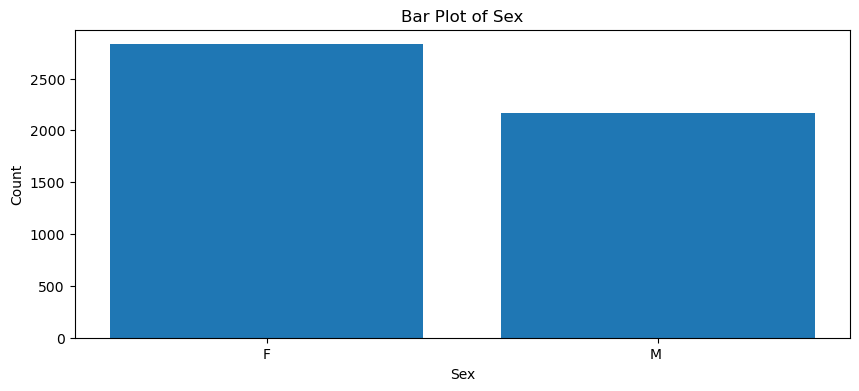

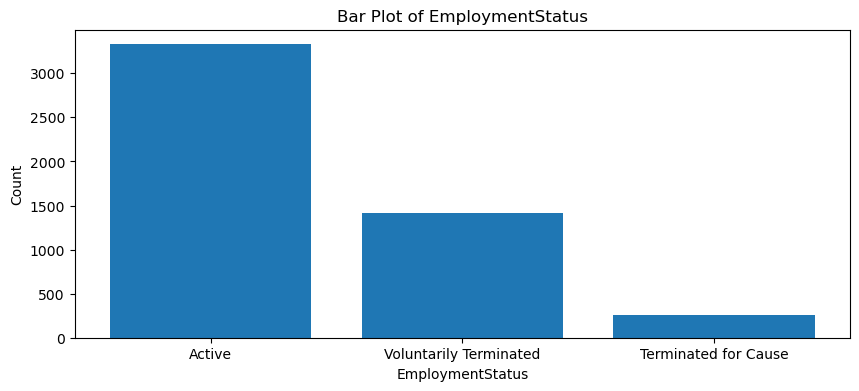

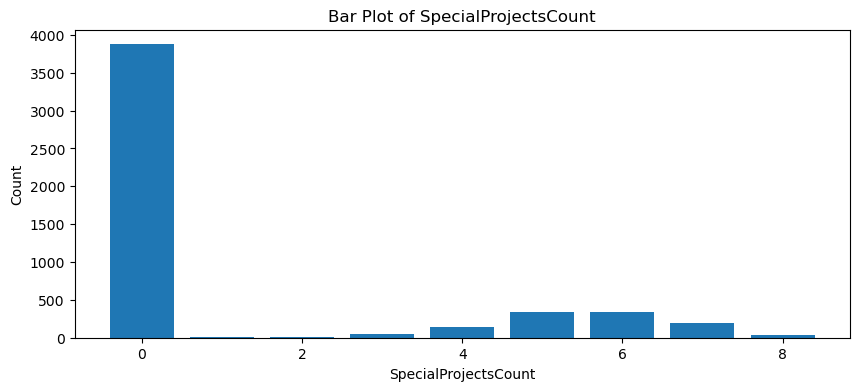

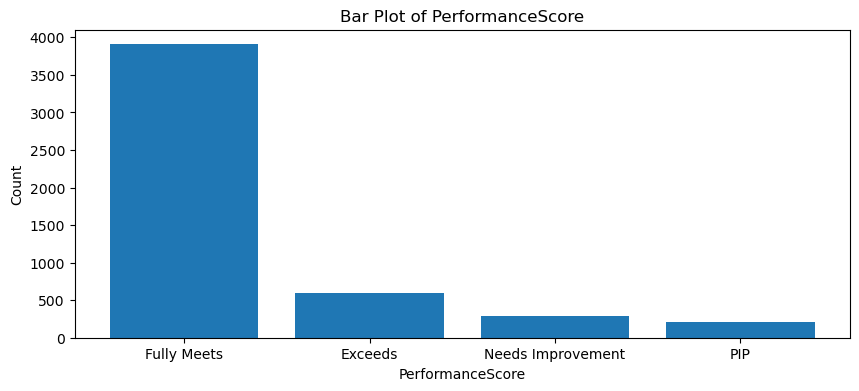

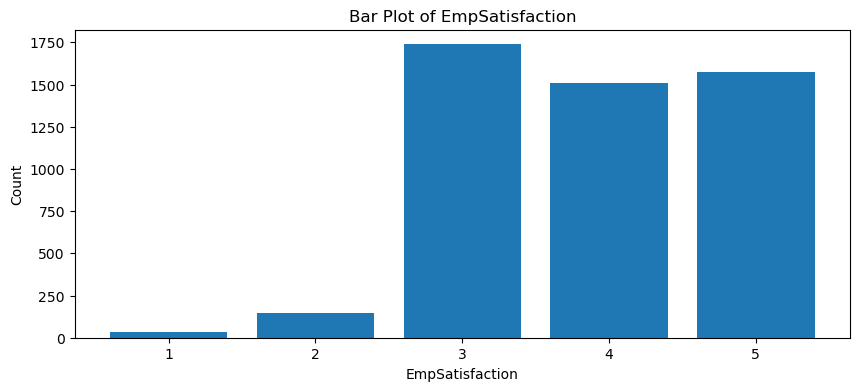

In [991]:
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    counts = df[col].value_counts()  # Count occurrences of each unique value
    plt.bar(counts.index, counts.values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.show()

## Bivariate Analysis

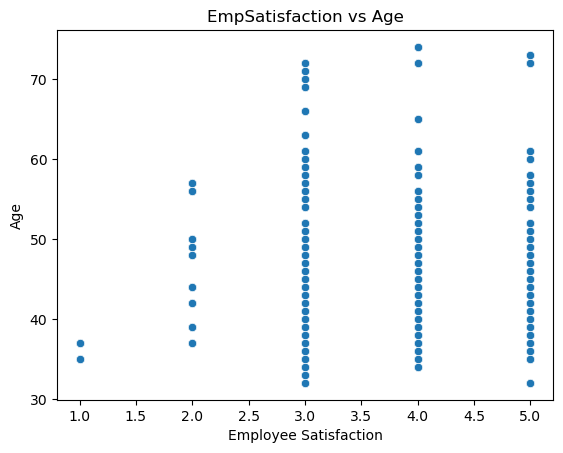

In [993]:
sns.scatterplot(x='EmpSatisfaction', y='Age', data=df)

# Add title and labels
plt.title('EmpSatisfaction vs Age')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Age')

# Show the plot
plt.show()

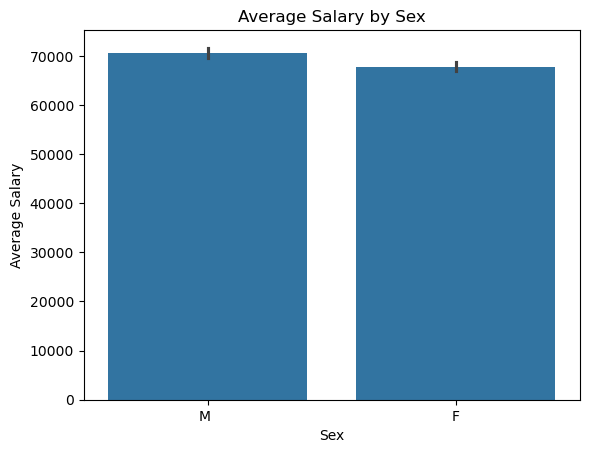

In [994]:
sns.barplot(x='Sex', y='Salary', data=df, estimator='mean')

# Add title and labels
plt.title('Average Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Salary')

# Show the plot
plt.show()

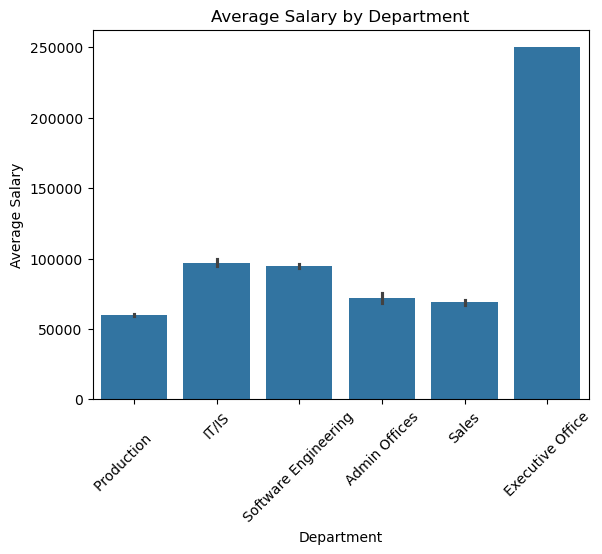

In [995]:
sns.barplot(x='Department', y='Salary', data=df, estimator='mean')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x labels if departments have long names
plt.show()

# Handling Outliers

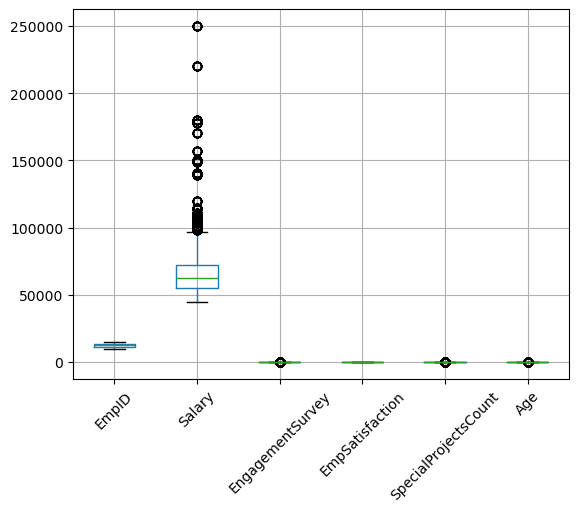

In [997]:
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [998]:
# column salary has outliers.it is not essential to handle it as  each employee may have different salary

In [999]:
# def remove_outliers(df, column_name):
#     if df[column_name].dtype in ['float64', 'int64']:  # Numeric columns
#         q1 = df[column_name].quantile(0.25)
#         q3 = df[column_name].quantile(0.75)
#         IQR = q3 - q1
#         upper_bound = q3 + 1.5 * IQR
#         lower_bound = q1 - 1.5 * IQR
        
    
#         df[column_name] = df[column_name].clip(upper=upper_bound, lower=lower_bound)
    
#     elif df[column_name].dtype == 'object':  
#         # Group rare categories into 'Other'
#         value_counts = df[column_name].value_counts()
#         rare_categories = value_counts[value_counts < 2].index  # Define a threshold for rarity (e.g., < 2 occurrences)
#         df[column_name] = df[column_name].replace(rare_categories, 'Other')
    
#     return df

# # Apply the remove_outliers function to all columns (numeric and categorical)
# for col in df.select_dtypes(include=['float64', 'int64', 'object']).columns:
#     df = remove_outliers(df, col)

# # Boxplot for numerical columns after handling outliers
# df.boxplot()
# plt.xticks(rotation=45)
# plt.show()

# Encoding Categorical Columns

In [1001]:
cat_df=df.select_dtypes(include=['object'])

In [1002]:
cat_df.columns

Index(['Position', 'State', 'Sex', 'EmploymentStatus', 'Department',
       'PerformanceScore'],
      dtype='object')

In [1003]:
ordinal_enc = OrdinalEncoder()

performance_levels = ['Fully Meets', 'Exceeds', 'Needs Improvement', 'PIP']
department_levels =  ['Production       ', 'IT/IS', 'Sales', 'Software Engineering', 'Admin Offices','Executive Office']
employment_status=['Active','Voluntarily Terminated','Terminated for Cause' ]
# Initialize and fit the OrdinalEncoder
ordinal_enc = OrdinalEncoder(categories=[performance_levels,department_levels,employment_status])

# Apply the encoder to 'PerformanceScore' and 'Department' columns
df[['PerformanceScore', 'Department','EmploymentStatus']] = ordinal_enc.fit_transform(df[['PerformanceScore', 'Department','EmploymentStatus']])
df = pd.get_dummies(df, columns=['State', 'Sex', 'Position'], drop_first=True,dtype=int)

In [1004]:
df

,EmpID,Salary,EmploymentStatus,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Age,State_AZ,...,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer
0,10026,62506,0.0,0.0,1.0,4.60,5,0,41,0,...,1,0,0,0,0,0,0,0,0,0
1,10084,104437,1.0,1.0,0.0,4.96,3,6,49,0,...,0,0,0,0,0,0,0,0,1,0
2,10196,64955,1.0,0.0,0.0,3.02,3,0,36,0,...,0,1,0,0,0,0,0,0,0,0
3,10088,64991,0.0,0.0,0.0,4.84,5,0,36,0,...,1,0,0,0,0,0,0,0,0,0
4,10069,50825,1.0,0.0,0.0,5.00,4,0,35,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,53250,0.0,0.0,0.0,4.20,4,0,45,0,...,1,0,0,0,0,0,0,0,0,0
4996,14997,51044,0.0,0.0,0.0,5.00,3,0,54,0,...,1,0,0,0,0,0,0,0,0,0
4997,14998,64919,0.0,0.0,0.0,4.20,3,0,66,0,...,1,0,0,0,0,0,0,0,0,0
4998,14999,62910,0.0,0.0,1.0,5.00,3,0,35,0,...,1,0,0,0,0,0,0,0,0,0


In [1005]:

df.dtypes

EmpID                                      int64
Salary                                     int64
EmploymentStatus                         float64
Department                               float64
PerformanceScore                         float64
                                          ...   
Position_Software Engineer                 int32
Position_Software Engineering Manager      int32
Position_Sr. Accountant                    int32
Position_Sr. DBA                           int32
Position_Sr. Network Engineer              int32
Length: 68, dtype: object

# Scaling

In [1007]:

target_column = 'Salary'


numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns


numeric_columns = numeric_columns[numeric_columns != target_column]


min_max = MinMaxScaler()
df[numeric_columns] = min_max.fit_transform(df[numeric_columns])



In [1008]:
df

,EmpID,Salary,EmploymentStatus,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Age,State_AZ,...,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer
0,0.005001,62506,0.0,0.0,0.333333,0.896907,1.00,0.00,0.214286,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016603,104437,0.5,0.2,0.000000,0.989691,0.50,0.75,0.404762,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.039008,64955,0.5,0.0,0.000000,0.489691,0.50,0.00,0.095238,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.017403,64991,0.0,0.0,0.000000,0.958763,1.00,0.00,0.095238,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013603,50825,0.5,0.0,0.000000,1.000000,0.75,0.00,0.071429,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.999200,53250,0.0,0.0,0.000000,0.793814,0.75,0.00,0.309524,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.999400,51044,0.0,0.0,0.000000,1.000000,0.50,0.00,0.523810,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.999600,64919,0.0,0.0,0.000000,0.793814,0.50,0.00,0.809524,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.999800,62910,0.0,0.0,0.333333,1.000000,0.50,0.00,0.071429,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Regression

In [1064]:
y=df['Salary']
X = df.drop("Salary",axis = 1)

In [1066]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [1068]:

model = LinearRegression()

In [1070]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [1072]:
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_value)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Absolute Error: 4361.002
Mean Squared Error 31017813.38
R2 score : 0.9512330376061587


In [1074]:
model = DecisionTreeRegressor(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_value)
print("Mean Squared Error:", mse)
print("R2 score :", r2)

Mean Absolute Error: 15.573
Mean Squared Error: 80839.443
R2 score : 0.9512330376061587


In [1076]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_value)
print("Mean Squared Error:", mse)
print("R2 score :", r2)

Mean Absolute Error: 14.70986999999996
Mean Squared Error: 43276.379730100016
R2 score : 0.9512330376061587
